In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import plotly.graph_objects as go
import plotly.io as pio
import pandas as pd
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [21]:
# Load the dataset
data = pd.read_csv('mcu_box_office.csv')


In [3]:
data.head(5)

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
0,Iron Man,1,5/2/2008,94,91,126,"186,000,000","102,118,668",318604126,585171547
1,The Incredible Hulk,1,6/13/2008,67,70,112,"137,500,000","55,414,050",134806913,265573859
2,Iron Man 2,1,5/7/2010,72,71,124,"170,000,000","128,122,480",312433331,621156389
3,Thor,1,5/6/2011,77,76,113,"150,000,000","65,723,338",181030624,449326618
4,Captain America: The First Avenger,1,7/22/2011,79,75,124,"140,000,000","65,058,524",176654505,370569776


In [23]:
# Calculate percentage of gross earnings from US relative to worldwide earnings
data['us_percentage'] = (data['domestic_box_office'] / data['worldwide_box_office']) * 100
data.head(5)

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office,us_percentage
0,Iron Man,1,5/2/2008,94,91,126,"186,000,000",102118668.0,318604126.0,585171547.0,54.446278
1,The Incredible Hulk,1,6/13/2008,67,70,112,"137,500,000",55414050.0,134806913.0,265573859.0,50.760611
2,Iron Man 2,1,5/7/2010,72,71,124,"170,000,000",128122480.0,312433331.0,621156389.0,50.298659
3,Thor,1,5/6/2011,77,76,113,"150,000,000",65723338.0,181030624.0,449326618.0,40.289317
4,Captain America: The First Avenger,1,7/22/2011,79,75,124,"140,000,000",65058524.0,176654505.0,370569776.0,47.671050


In [24]:
data.dtypes

movie_title              object
mcu_phase                 int64
release_date             object
tomato_meter              int64
audience_score            int64
movie_duration            int64
production_budget        object
opening_weekend         float64
domestic_box_office     float64
worldwide_box_office    float64
us_percentage           float64
dtype: object

In [6]:
# Descriptive Statistics
print("Descriptive Statistics:")
data.describe()

Descriptive Statistics:


,mcu_phase,tomato_meter,audience_score,movie_duration,domestic_box_office,worldwide_box_office,us_percentage
count,27.000000,27.000000,27.000000,27.000000,2.700000e+01,2.700000e+01,27.000000
mean,2.481481,83.555556,83.740741,131.925926,3.675189e+08,9.505850e+08,40.532513
std,1.014145,11.112479,11.002072,15.531422,2.024268e+08,5.919297e+08,7.200062
min,1.000000,47.000000,45.000000,111.000000,1.348069e+08,2.655739e+08,30.680278
25%,2.000000,79.000000,78.000000,122.500000,2.115054e+08,5.520150e+08,34.606788
50%,3.000000,87.000000,87.000000,130.000000,3.186041e+08,7.708824e+08,38.048898
75%,3.000000,91.500000,91.000000,138.000000,4.179111e+08,1.183655e+09,46.261439
max,4.000000,96.000000,98.000000,181.000000,8.583730e+08,2.797801e+09,54.446278


## 📈 Findings Summary 📈



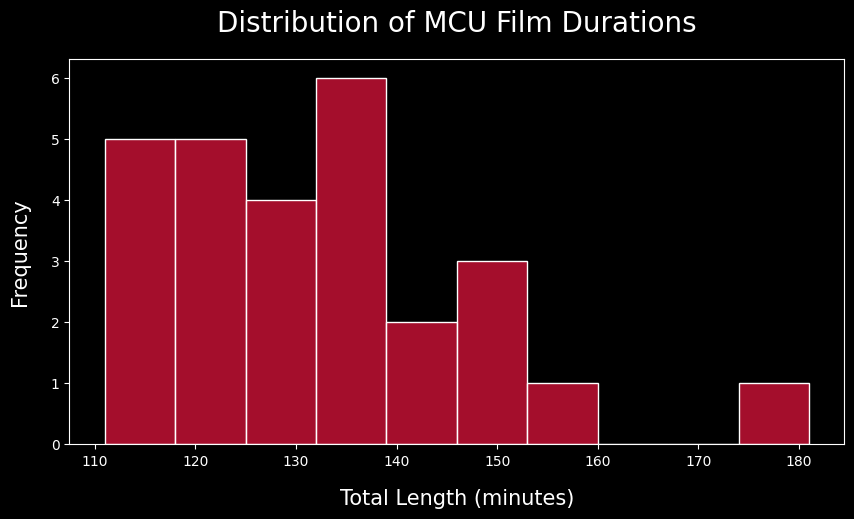

In [23]:

fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data['movie_duration'], bins=10)
ax.set_title('Distribution of MCU Film Durations', fontsize=20,  pad=20)
ax.set_xlabel('Total Length (minutes)', fontsize=15,  labelpad=15)
ax.set_ylabel('Frequency', fontsize=15, labelpad=15)
plt.show()


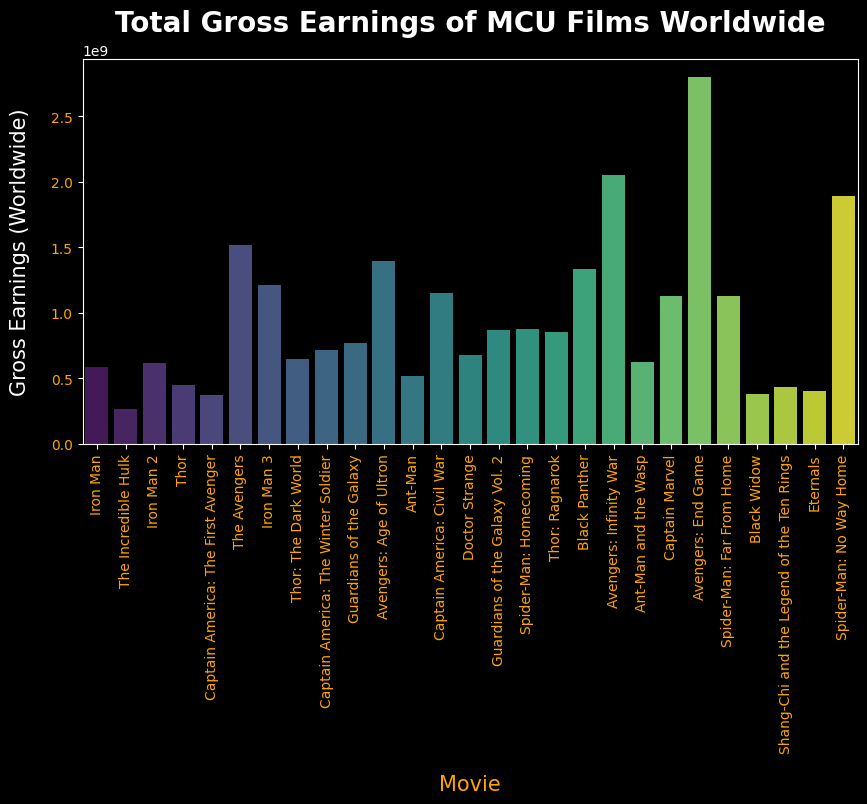

In [38]:

sns.set_palette('viridis')  
plt.figure(figsize=(10,5))
sns.barplot(x='movie_title', y='worldwide_box_office', data=data, palette='viridis')
plt.xticks(rotation=90, color='#FFA500')  
plt.yticks(color='#FFA500')  
plt.title('Total Gross Earnings of MCU Films Worldwide', fontsize=20, weight='bold', pad=20)
plt.xlabel('Movie', fontsize=15, color='#FFA500', labelpad=15)
plt.ylabel('Gross Earnings (Worldwide)', fontsize=15, labelpad=15)
plt.show()

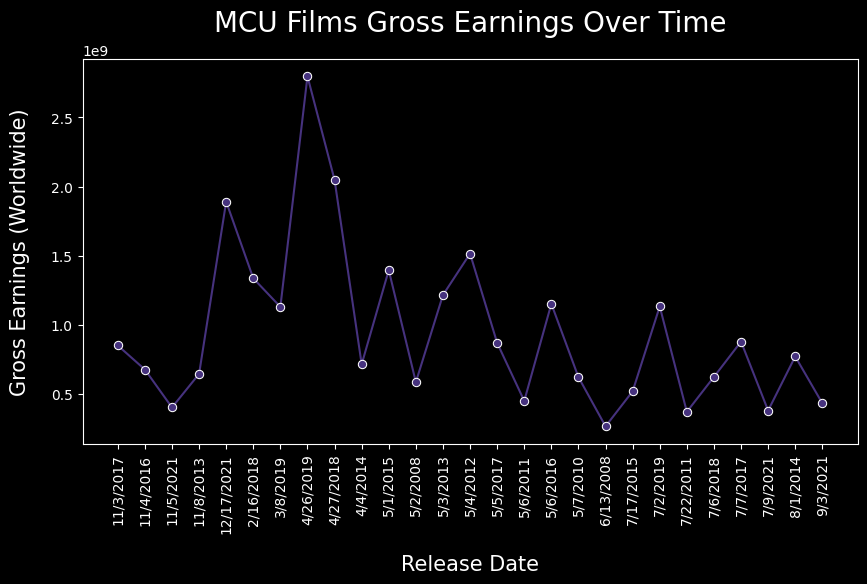

In [46]:

data_sorted = data.sort_values('release_date')
plt.figure(figsize=(10,5))
sns.lineplot(x='release_date', y='worldwide_box_office', data=data_sorted, marker='o')
plt.title('MCU Films Gross Earnings Over Time', fontsize=20,  pad=20)
plt.xlabel('Release Date', fontsize=15, labelpad=15)
plt.ylabel('Gross Earnings (Worldwide)', fontsize=15, labelpad=15)
plt.xticks(rotation=90)  
ax = plt.gca()

plt.show()

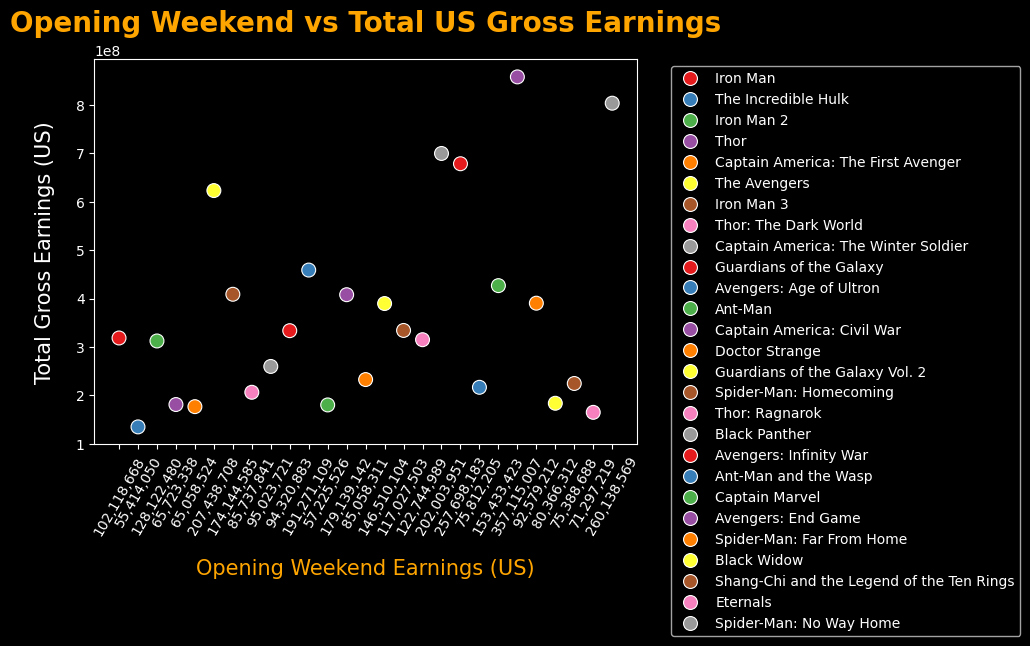

In [15]:
plt.style.use('dark_background')
plt.figure(figsize=(7,5))
sns.scatterplot(x='opening_weekend', y='domestic_box_office', data=data, hue='movie_title', palette='Set1', s=100)
plt.title('Opening Weekend vs Total US Gross Earnings', fontsize=20, color='#FFA500', weight='bold', pad=20)
plt.xlabel('Opening Weekend Earnings (US)', fontsize=15, color='#FFA500', labelpad=15)
plt.ylabel('Total Gross Earnings (US)', fontsize=15, labelpad=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=60)
ax = plt.gca()

plt.show()

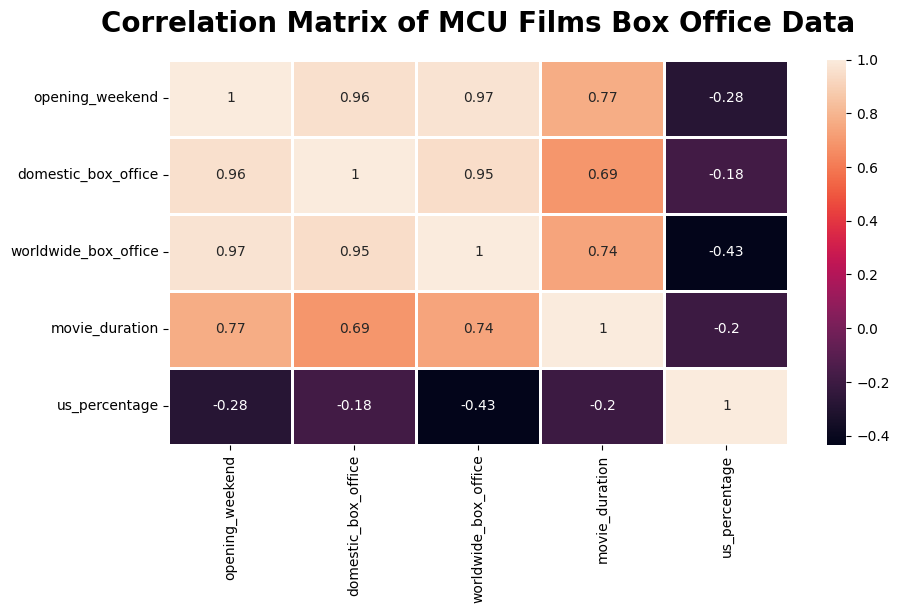

In [30]:
plt.figure(figsize=(10, 5))
correlation_matrix = data[['opening_weekend', 'domestic_box_office', 'worldwide_box_office', 'movie_duration', 'us_percentage']].corr()
sns.heatmap(correlation_matrix, annot=True, cbar=True, linewidths=1)
plt.title('Correlation Matrix of MCU Films Box Office Data', fontsize=20, weight='bold', pad=20)
ax = plt.gca()
plt.show()

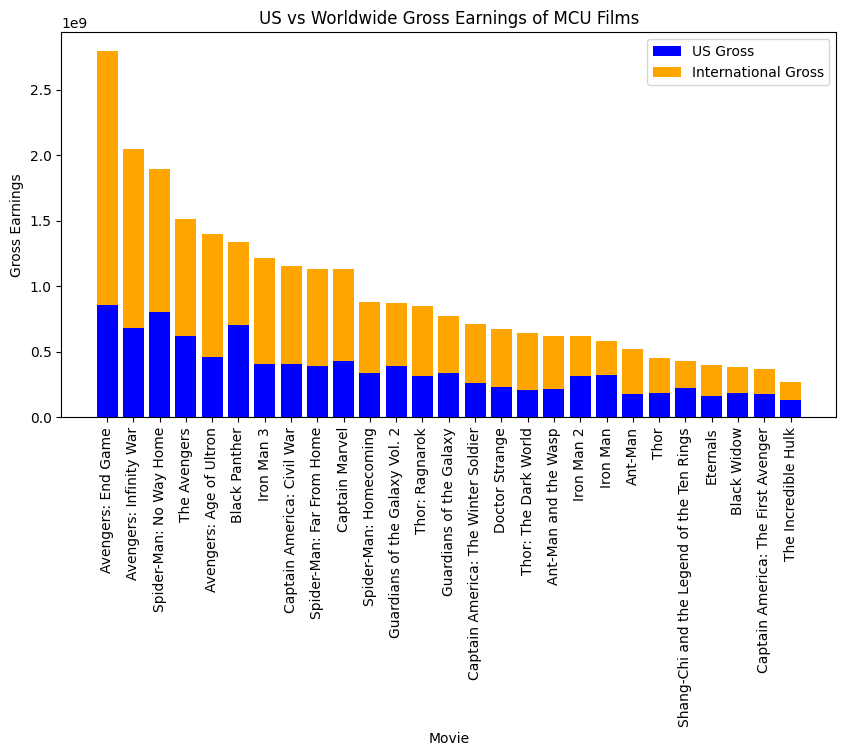

In [31]:
plt.figure(figsize=(10,5))
data_sorted_by_gross = data.sort_values('worldwide_box_office', ascending=False)
bar1 = plt.bar(data_sorted_by_gross['movie_title'], data_sorted_by_gross['domestic_box_office'], color='b', label='US Gross')
bar2 = plt.bar(data_sorted_by_gross['movie_title'], data_sorted_by_gross['worldwide_box_office'] - data_sorted_by_gross['domestic_box_office'],
               bottom=data_sorted_by_gross['domestic_box_office'], color='orange', label='International Gross')

plt.title('US vs Worldwide Gross Earnings of MCU Films')
plt.xlabel('Movie')
plt.ylabel('Gross Earnings')
plt.xticks(rotation=90)
plt.legend()
plt.show()

<div style="font-family: 'Amiri', serif; border: 3px solid red; padding: 10px;">
    <p>
   Observations: Generally, MCU films have higher international gross than US domestic gross. “Avengers: Endgame” stands out with the highest earnings both in the US and internationally.</p>
</div>

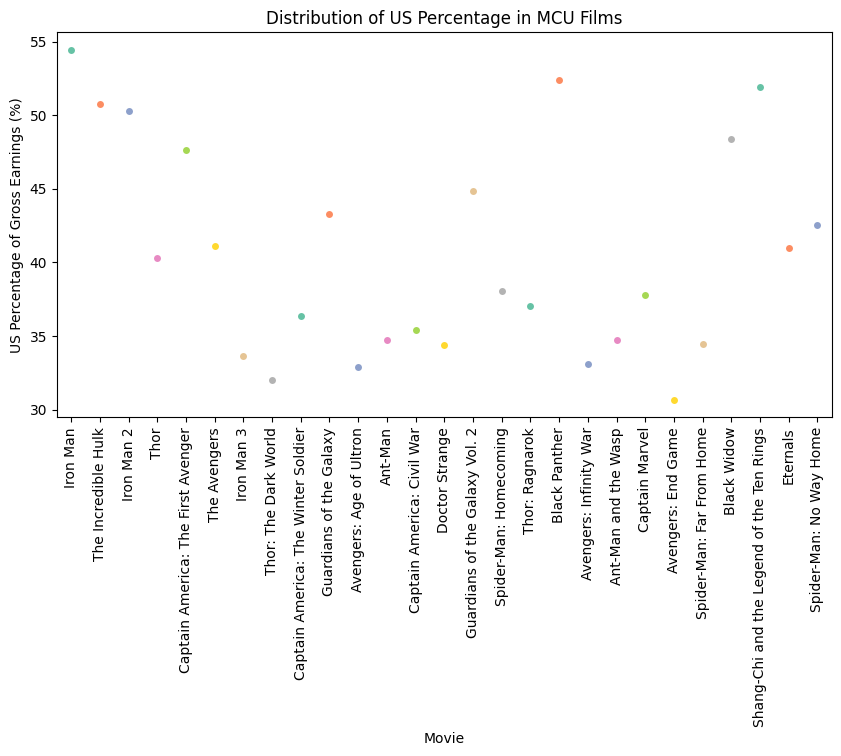

In [32]:
plt.figure(figsize=(10,5))
sns.swarmplot(x='movie_title', y='us_percentage', data=data, palette='Set2')
plt.title('Distribution of US Percentage in MCU Films')
plt.xlabel('Movie')
plt.ylabel('US Percentage of Gross Earnings (%)')
plt.xticks(rotation=90)
plt.show()


<div style="font-family: 'Amiri', serif; border: 3px solid red; padding: 10px;">
    <p>
   There seems to be a variety in the US percentage across the MCU films.</p>
</div>

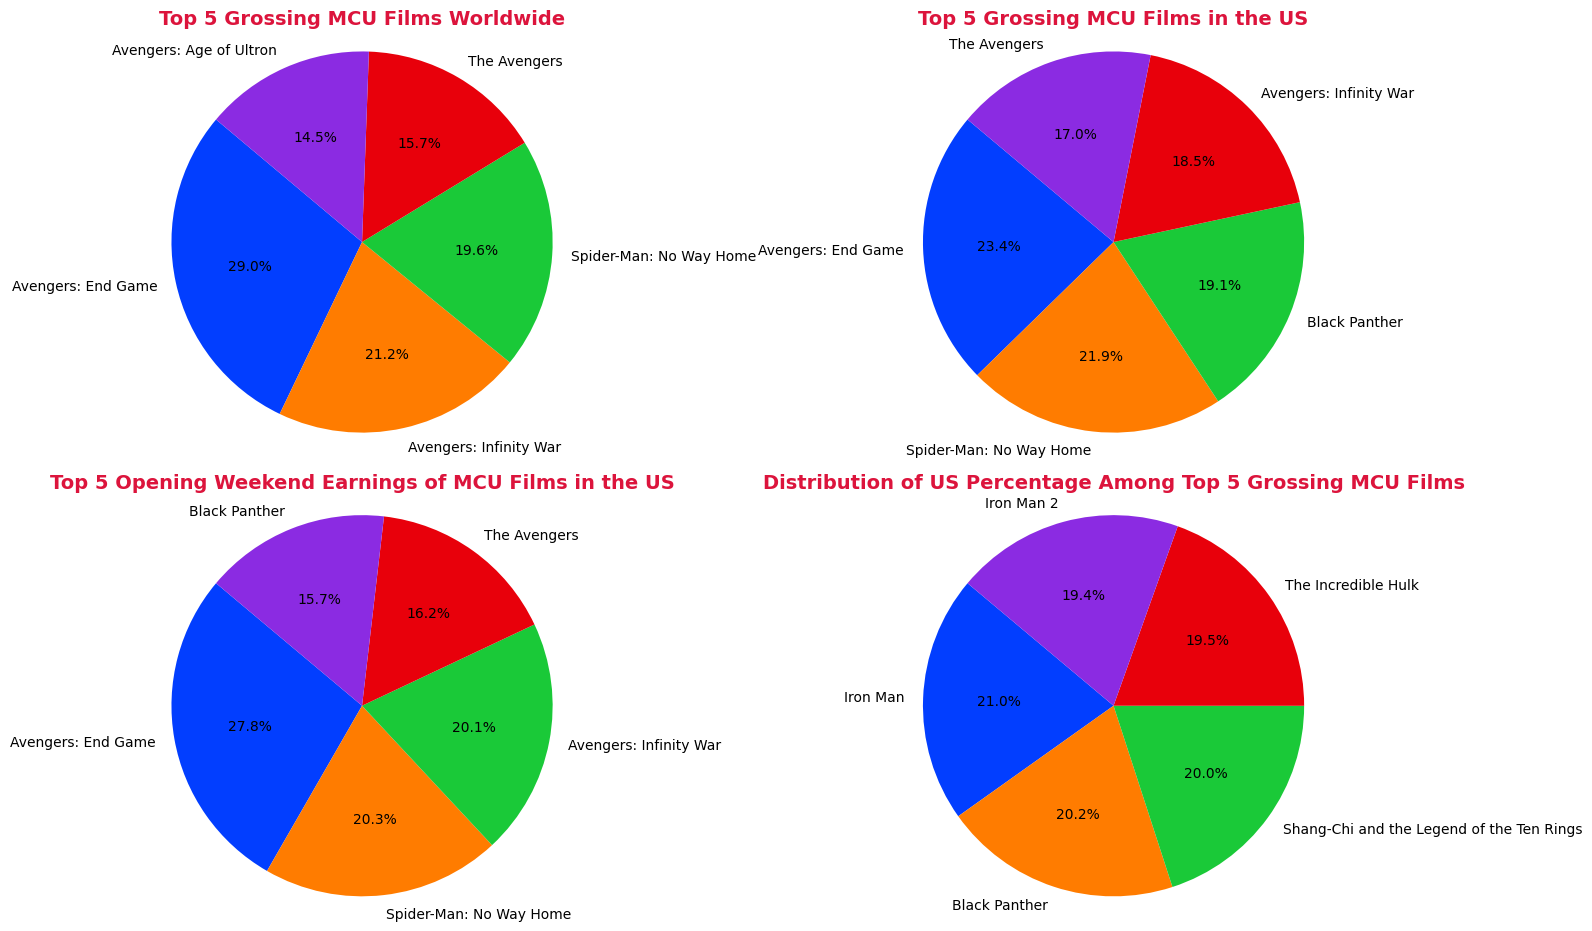

In [37]:
pie_data = [
    {'title': 'Top 5 Grossing MCU Films Worldwide', 'column': 'worldwide_box_office'},
    {'title': 'Top 5 Grossing MCU Films in the US', 'column': 'domestic_box_office'},
    {'title': 'Top 5 Opening Weekend Earnings of MCU Films in the US', 'column': 'opening_weekend'},
    {'title': 'Distribution of US Percentage Among Top 5 Grossing MCU Films', 'column': 'us_percentage'},
]

bright_palette = sns.color_palette('bright')

plt.figure(figsize=(16, 14))
for i, subset in enumerate(pie_data, start=1):
    plt.subplot(3, 2, i)
    if subset['column'] == 'release_date':
        top5_films_by_year = data.sort_values('worldwide_box_office', ascending=False).head(5)
        plt.pie(top5_films_by_year['worldwide_box_office'], labels=top5_films_by_year['release_date'].dt.year, autopct='%1.1f%%', startangle=140, colors=bright_palette)
    else:
        top5_films = data.nlargest(5, subset['column'])
        plt.pie(top5_films[subset['column']], labels=top5_films['movie_title'], autopct='%1.1f%%', startangle=140, colors=bright_palette)
    
    plt.title(subset['title'], color='crimson', fontsize=14, weight='bold')
    plt.axis('equal')

plt.tight_layout()
plt.show()
